In [2]:
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from statsmodels.stats.power import tt_ind_solve_power

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 9.1/9.1 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### **T test**

A t test is inferntial statistics which is used to determine if there is a significant difference betweenthe means of two groups which may be related in certain features

T-test has 2 types: 1) One sampled t test     2) Two sampled t test
    
    t= (sample mean - population mean) / standard error

In [3]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [4]:
#Lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([14, 40, 55, 16, 16, 35, 14, 35, 28, 21])

In [5]:
from scipy.stats import ttest_1samp

In [6]:
ttest,p_value=ttest_1samp(age_sample,30)

In [7]:
print(p_value)

0.5640289663170721


In [8]:
if p_value < 0.05:
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

We are accepting null hypothesis


In [9]:
df=pd.read_excel('result.xlsx')
df

,Roll No,Name,Sub1,Sub2,Sub3,Total,Result
0,101,Akash,45,45,45,135,P
1,102,Manoj,35,45,42,122,P
2,103,Saurabh,29,26,30,85,P
3,104,Ashish,38,35,29,102,P
4,105,Sudhir,41,40,34,115,P
5,106,Ria,46,62,41,149,P
6,107,Prathana,29,48,27,104,P
7,108,Mihika,43,33,33,109,P
8,109,Shaurya,37,30,38,105,P
9,110,Mrunal,33,31,41,105,P


In [10]:
df.describe()

,Roll No,Sub1,Sub2,Sub3,Total
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,105.50000,37.600000,39.500000,36.000000,113.100000
std,3.02765,6.168018,10.783217,6.236096,18.241893
min,101.00000,29.000000,26.000000,27.000000,85.000000
25%,103.25000,33.500000,31.500000,30.750000,104.250000
50%,105.50000,37.500000,37.500000,36.000000,107.000000
75%,107.75000,42.500000,45.000000,41.000000,120.250000
max,110.00000,46.000000,62.000000,45.000000,149.000000


### **Hypothesis Testing or Significance Testing**

Hypothesis testing is a set of formal procedures used by statisticians to either accept or reject statistical hypotheses. Statistical hypotheses are of two types:

Null hypothesis, H0 - represents a hypothesis of chance basis.

Alternative hypothesis, Ha - represents a hypothesis of observations which are influenced by some non-random cause.

(1) check if total mean value of marks is not more than 113.

Null Hypothesis will be

Ho : mu <= 113

Alternate Hypothesis will be

Ha : mu > 113

**One way hypothesis**

In [11]:
Ho = "mu <= 113"
# alt hyp
Ha = "mu > 113"
# alpha
al = 0.05
# mu -> mean
mu = 113
# tail type
tt = 1
# data
marks = df['Total'].values
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)
print(marks)
print("")

Ho: mu <= 113
Ha: mu > 113
al: 0.05
mu: 113
[135 122  85 102 115 149 104 109 105 105]



In [12]:
ts, pv = ttest_1samp(marks, mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv = pv
t1pv = pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

t-stat 0.017335249305284756
p-vals 0.9865473848679749
1t pv 1.9730947697359498
2t pv 0.9865473848679749


In [13]:
if tt == 1:
    if t1pv < al:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)
else:
    if t2pv < al/2:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)

Null Hypothesis: Not Rejected
Conclusion: mu <= 113


**Two way Hypothesis**

In [14]:
# Problem: Check if the total mean marks is  equal to 113

#Ho:	m = 113
#Ha:	m != 113
#Tail: Two
#Test: One Sample Mean without std

# null hyp
Ho = "mu = 113"
# alt hyp
Ha = "mu != 113"
# alpha
al = 0.05
# mu - mean
mu = 113
# tail type
tt = 2
# data
marks = df['Total'].values
# print
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)
print(marks)
print("")

Ho: mu = 113
Ha: mu != 113
al: 0.05
mu: 113
[135 122  85 102 115 149 104 109 105 105]



In [15]:
ts, pv = ttest_1samp(marks, mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv = pv
t1pv = pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

t-stat 0.017335249305284756
p-vals 0.9865473848679749
1t pv 1.9730947697359498
2t pv 0.9865473848679749


In [16]:
if tt == 1:
    if t1pv < al:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)
else:
    if t2pv < al/2:
        print("Null Hypothesis: Rejected")
        print("Conclusion:",Ha)
    else:
        print("Null Hypothesis: Not Rejected")
        print("Conclusion:",Ho)

Null Hypothesis: Not Rejected
Conclusion: mu = 113


**AB Testing**

AB testing is essentially an experiment where two or more variants of a page are shown to users at random, and statistical analysis is used to determine which variation performs better for a given conversion goal.

In [17]:
subj1 = np.array([45,36,29,40,46,37,43,39,28,33])
subj2 = np.array([40,20,30,35,29,43,40,39,28,31])

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

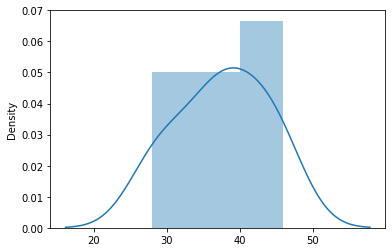

In [18]:
sns.distplot(subj1)

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

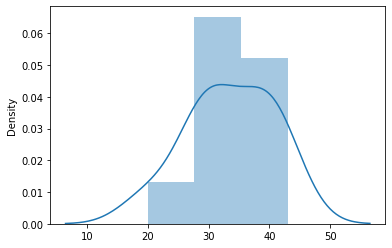

In [19]:
sns.distplot(subj2)

In [20]:
t_stat, p_val= stats.ttest_ind(subj1,subj2)
t_stat , p_val


(1.365908039538178, 0.18879292981719703)

The two hypotheses for this particular two sample t-test are as follows:

H0: µ1 = µ2 (the two population means are equal)

HA: µ1 ≠µ2 (the two population means are not equal)

In [21]:
#perform two sample t-test with equal variances
stats.ttest_ind(subj1, subj2, equal_var=True)

Ttest_indResult(statistic=1.365908039538178, pvalue=0.18879292981719703)

The t test statistic is 1.3659 and the corresponding two-sided p-value is 0.1887. Because the p-value of our test (0.1887) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.

We do not have sufficient evidence to say that the mean marks of sub1 and subj2 between the two is different.

**Type I error Type II error**

Type I and Type II errors signifies the erroneous outcomes of statistical hypothesis tests. Type I error represents the incorrect rejection of a valid null hypothesis whereas Type II error represents the incorrect retention of an invalid null hypothesis.

Scientists often plan for studies by calculating how many subjects or units need to be tested in order to find an effect. That is, they plan for a study using statistical power according to principles of hypothesis testing

The tt_ind_solve_power() function requires the following parameters to calculate sample size:

<pre>
        effect_size: The standardised effect size ie. difference between the two means divided by the standard deviation; 
                     this value has to be positive.

        alpha: Significance level or probability of Type I error (false positives), usually set at 0.05.

        power: Power of the test, or 1 – probability of Type II error (false negatives), usually set at 0.8.

        ratio: Ratio of sample size in sample 2 relative to sample 1, default set at 1.
                 (This function can be used to calculate power for unevenly-sized samples.)

        alternative: Power the test to detect two-sided effects (eg. the effect could be an increase or a reduction in outcome,
         not forced to be only an increase in outcome.)
</pre>

In [22]:
effect_size=abs((subj1.mean()-subj2.mean())/(subj1.std()-subj2.std()))
sample_size=10
alpha=0.05
ratio=1.0

statistical_power = tt_ind_solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, ratio=1.0, alternative='two-sided')
print(statistical_power)

1.0


In [23]:
type_2_error=1-statistical_power
type_2_error

0.0